In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/TASK2- DATA.xlsx")
df.head(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,89,NaN,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,2024-12-13 00:00:00,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar


In [ ]:
df.tail(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
1559,2O/21,Serie A,36,O5-12-21,A,Juventus FC,US Sassuolo,1:O3,CF,45,O:O2,Left-footed shot,NaN
1560,2024-12-13 00:00:00,UEFA Champions League,Group Stage,1O-O3-12,A,Real Madrid,Ajax Amsterdam,1:O4,LW,79,1:O3,Right-footed shot,Karim Benzema
1561,14/15,LaLiga,22,O2/O8-15,A,FC Barcelona,Athletic Bilbao,2:O5,RW,15,O:O1,Direct free kick,NaN
1562,2O/21,Serie A,27,3/14/21,A,Juventus FC,Cagliari Calcio,1:O3,CF,32,O:O3,Left-footed shot,Federico Chiesa
1563,13/14,LaLiga,31,3/29/14,H,Real Madrid,Rayo Vallecano,5:OO,LW,15,1:OO,Right-footed shot,Gareth Bale


In [ ]:
df.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [ ]:
df.shape

(1564, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Minute            1500 non-null   object
 10  At_score          1507 non-null   object
 11  Type              1475 non-null   object
 12  Goal_assist       1012 non-null   object
dtypes: object(13)
memory usage: 159.0+ KB


In [ ]:
df.duplicated().sum()

50

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Season,51
Competition,64
Matchday,55
Date,64
Venue,58
Club,52
Opponent,60
Result,62
Playing_Position,122
Minute,62


In [ ]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_to_check = ['Season','Competition','Matchday', 'Date','Venue','Club','Opponent','Result','Playing_Position','Minute','At_score','Type','Goal_assist']
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

Season: 3.37%
Competition: 4.23%
Matchday: 3.63%
Date: 4.23%
Venue: 3.83%
Club: 3.43%
Opponent: 3.96%
Result: 4.1%
Playing_Position: 8.06%
Minute: 4.1%
At_score: 3.57%
Type: 5.61%
Goal_assist: 35.47%


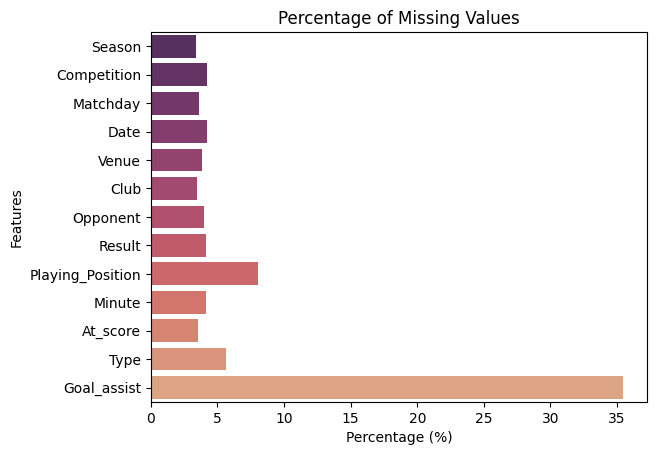

In [ ]:
sns.barplot(data=null_percentages, x=null_percentages.values(), y=null_percentages.keys(), palette='flare_r', legend=False, hue=null_percentages.keys()).set(title="Percentage of Missing Values", xlabel="Percentage (%)", ylabel="Features")
plt.show()

## **Handling Null Values**

For the following columns, the percentage of missing values is less than 10% and so we can just drop the rows that have null values.

In [ ]:
df.dropna(subset=['Season','Competition','Matchday','Date','Venue','Club','Opponent','Result','Playing_Position','Minute','At_score','Type'], inplace=True)

The null values in goal assist means that no one has assisted the goal and therefore can be replaced by nan.

In [ ]:
df['Goal_assist'].fillna('nan', inplace=True)

## **Data PreProcessing**

The date is in format MM_DD_YY

In [ ]:
df[['Match_Month', 'Match_Day', 'Match_Year']] = df['Date'].str.split('-' or '/', expand=True)


In [ ]:
df.head(5)


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Match_Day,Match_Date,Match_Year,Match_Month
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,nan,None,None,None,2/28/16
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano,O1,O1,17,O3
3,2024-12-13 00:00:00,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso,O8,O8,13,O5
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar,None,None,None,1O/5/22
5,15/16,UEFA Champions League,last 16,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,64,1:OO,Right-footed shot,Lucas Vazquez,O8,O8,16,O3


## **Visualization**

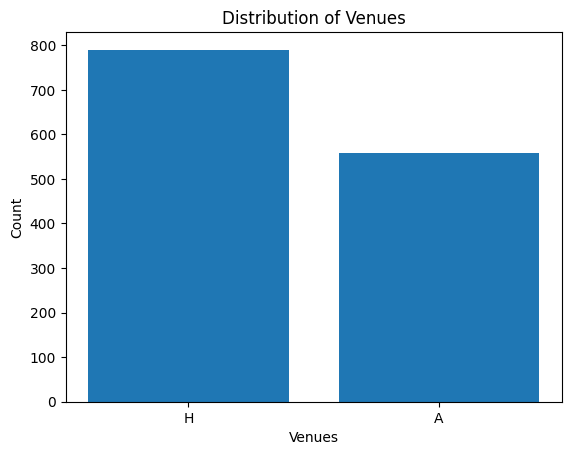

In [ ]:
venue = pd.DataFrame(df["Venue"].value_counts())
plt.bar(x=venue.index, height=venue["count"],)
plt.xlabel("Venues")
plt.ylabel("Count")
plt.title("Distribution of Venues")
plt.show()

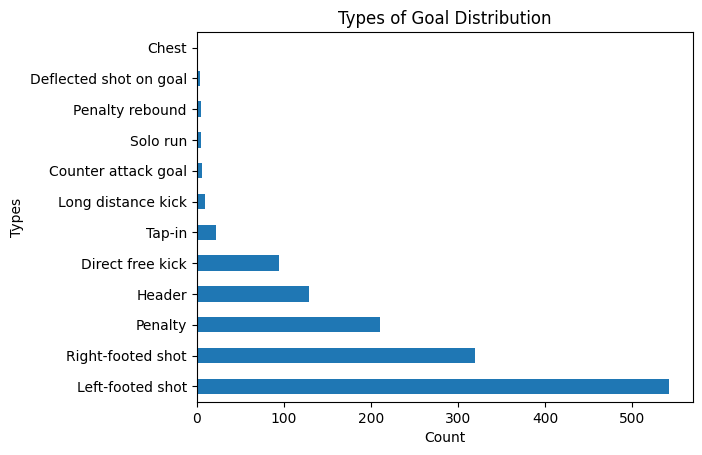

In [ ]:
df['Type'].value_counts().plot(kind='barh')
plt.title('Types of Goal Distribution')
plt.xlabel('Count')
plt.ylabel('Types')
plt.show()

**Observation:**

This graph shows that majority of the goals which were hit are from :
1. Left-Footed Shot.
2. Right-Footed Shot.
3. Penalty Shot.
4. Header Shot.
5. Direct Free Kick


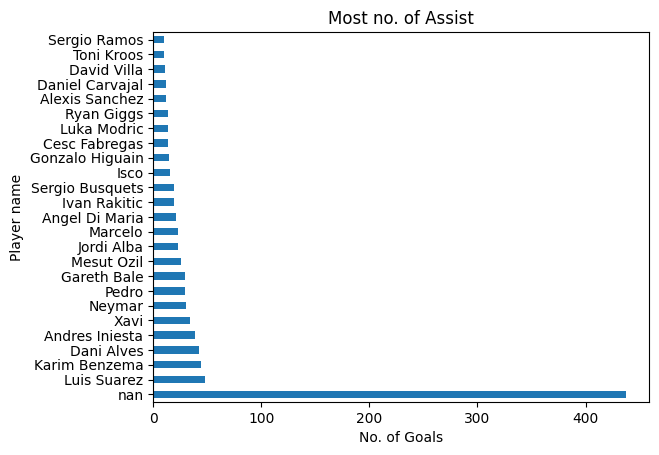

In [ ]:
df['Goal_assist'].value_counts().head(25).plot(kind='barh')
plt.title('Most no. of Assist')
plt.xlabel('No. of Goals')
plt.ylabel('Player name')
plt.show()

**Observation**

The graph telss that most no of goals scored were direct without any assist.
And the most no of assits were given by:


1.   Luis Suarez
2.   Karim Benzema
3.   Dani Alves
4.   Andres Iniesta
5.   Xavi
6.   Neymar



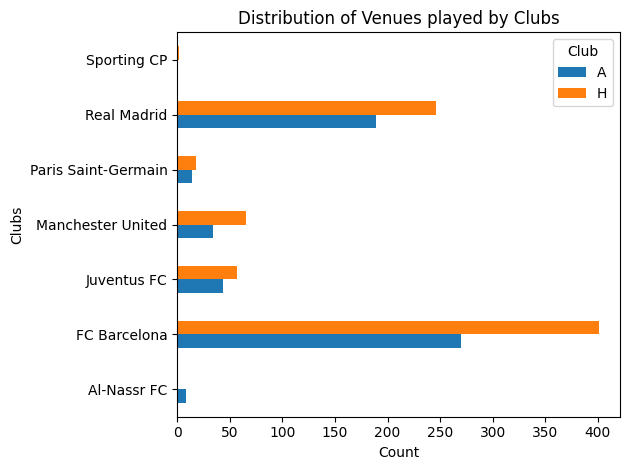

In [ ]:
club_venue = df.groupby(['Club', 'Venue'])['Venue'].count().unstack()
club_venue.plot(kind='barh')
plt.title('Distribution of Venues played by Clubs')
plt.ylabel('Clubs')
plt.xlabel('Count')
plt.legend(title='Club')
plt.tight_layout()
plt.show()

**Observation**:

This graph shows the number of games played by each club at **home** and **away** .

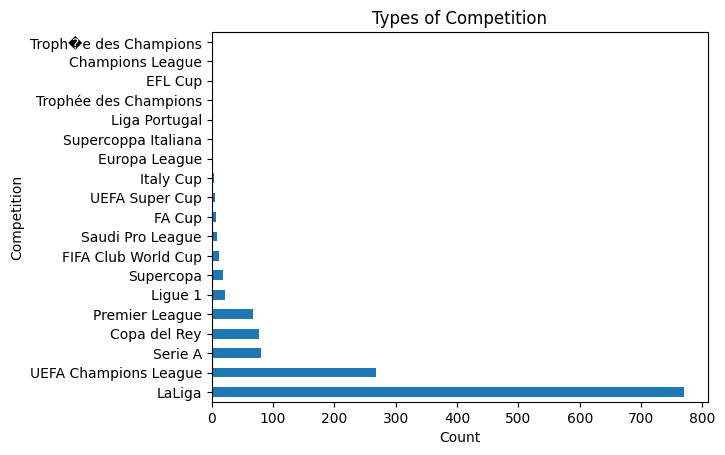

In [ ]:
df['Competition'].value_counts().plot(kind='barh')
plt.title('Types of Competition')
plt.xlabel('Count')
plt.ylabel('Competition')
plt.show()

**Observation:**

This graph shows the Various Competitions which are being held and the no of matches played in each league.
The leagues with most no. of matches are:
1.   LaLiga
2.   UEFA Champions League
3.   Serie A
4.   Copa del Ray
5.   Premier League

